# India vs Rest of the world- A comparision

### Introduction

We are going to look at the following question in this notebook

* How India stack up against Rest of the world in Salaries
* Comparison of Career and Job Satisfaction for Indian vs Rest of the world
* Does Indian programmer feel they are underpaid than rest of the world

In [105]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data Understanding
Let us first look at the data and following viewpoints

1. Top Nationality of the programmers
2. Top kind of developers
3. Formal Education

and few others

In [106]:
#Read the data
df = pd.read_csv('survey_results_public.csv')
df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [107]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [108]:
# Bar plot functions
def display_top_n_bar_chart(df, column, title,n=3):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    n: top n in descending order
    
    Returns:
    None
    
    '''
    status = df[column].value_counts()
    (status[:n]).plot(kind="bar");
    plt.title(title+" (Top "+str(n)+")");

#### Top Nationality of the programmers

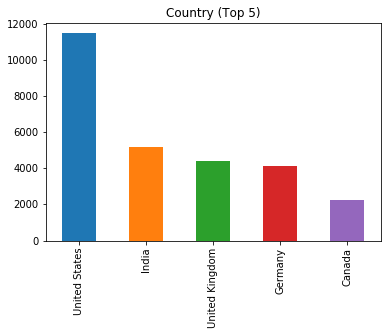

In [109]:
display_top_n_bar_chart(df, "Country", "Country", 5)

#### Top kind of developers

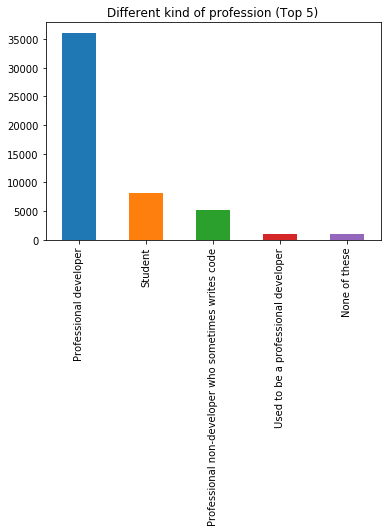

In [110]:
display_top_n_bar_chart(df, "Professional", "Different kind of profession",5)

#### Salary Ranges

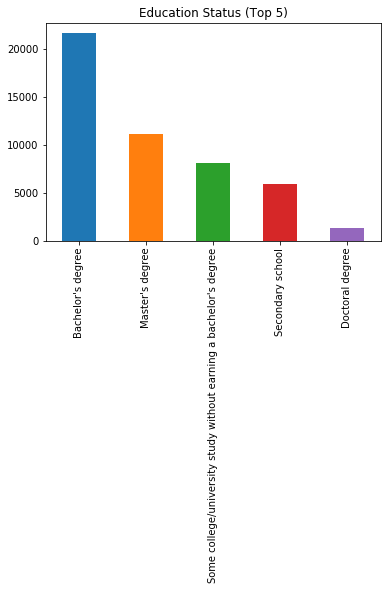

In [111]:
#Provide a pandas series of the counts for each Overpaid status
display_top_n_bar_chart(df, "FormalEducation", "Education Status",5)

### Data Aggregation

We are now going to separate the data based on the country, We are going to separate India and rest of the world. The following code will help us to do that


In [112]:
def separate_country(df):
    '''
    Return a dataframe that filters out the data for India and rest of the world
    Parameters:
    df: a raw data dataframe
    Returns:
    df: a dataframe with a new column Rest_or_India
    
    '''
    '''
    rest = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland','Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 
           'Indonesia', 'Vietnam']
    '''
    India = ['India']
    
    #Add a new catagory seperating to western and eastern
    #df['Rest_or_India'] = df['Country'].apply(lambda x: 'rest' if x in rest else ('India' if x in India else 'rest'))
    df['Rest_or_India'] = df['Country'].apply(lambda x: 'India' if x in India else 'rest')
    
    return df

Next we are going to filter the dataset with the below columns.
- Country: Country they are living
- YearsCodedJob: Years they are coding
- EmploymentStatus: Their employment status
- Salary: Salary of the people
- JobSatisfaction & CareerSatisfaction: Are their satisfy their job and career
- Overpaid: How they think about their salary

Let us focus only on professional developers to keep it narrow

In [113]:
def filter_data(df):
    '''
    The fucntion will help us to filter the data with the columns we need for analysis
    Parameters:
    df: a raw data dataframe
    Returns:
    useful_df: a filtered dataframe with only columns we need for analysis
    
    '''
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'Rest_or_India', 'Overpaid']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [114]:
#Get some useful columns for analysis
df = separate_country(df)
df_updated = filter_data(df)
df_updated.head()

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,Rest_or_India,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,rest,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,rest,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,rest,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,rest,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.0,rest,Somewhat underpaid


Let us now convert the categorical overpaid columnt to numeric so that we can compare the means scores

In [115]:
def map_overpaid(df):
    """
    
    For each level assign a number
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: dataframe with numeric values
    
    """
    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )
    
    return df

In [116]:
df_updated = map_overpaid(df_updated)
df_updated = df_updated.groupby(['Rest_or_India','YearsCodedJob']).mean()
df_updated

CareerSatisfaction  JobSatisfaction  \
Rest_or_India YearsCodedJob                                           
India         1 to 2 years                6.582656         5.848238   
              10 to 11 years              7.520000         6.280000   
              11 to 12 years              7.166667         6.222222   
              12 to 13 years              7.333333         5.833333   
              13 to 14 years              7.333333         7.666667   
              14 to 15 years              7.000000         5.500000   
              15 to 16 years              7.600000         6.800000   
              16 to 17 years              7.000000         7.000000   
              18 to 19 years              8.000000         7.666667   
              19 to 20 years              7.400000         7.400000   
              2 to 3 years                6.971154         6.205128   
              20 or more years            7.500000         4.500000   
              3 to 4 years                6.828829         6.009009   
              4 to 5 years                6.968553         6.449367   
              5 to 6 years                7.112782         6.383459   
              6 to 7 years                7.111111         6.750000   
              7 to 8 years                7.078431         6.686275   
              8 to 9 years                7.045455         6.318182   
              9 to 10 years               6.800000         6.733333   
              Less than a year            6.611111         6.033333   
rest          1 to 2 years                7.543067         7.028436   
              10 to 11 years              7.538877         7.069264   
              11 to 12 years              7.597510         7.131250   
              12 to 13 years              7.565820         7.025404   
              13 to 14 years              7.462733         7.065217   
              14 to 15 years              7.471429         7.054893   
              15 to 16 years              7.471459         7.093023   
              16 to 17 years              7.632184         7.243678   
              17 to 18 years              7.672414         7.304598   
              18 to 19 years              7.508621         7.125000   
              19 to 20 years              7.500000         6.903361   
              2 to 3 years                7.500000         7.000000   
              20 or more years            7.838868         7.330665   
              3 to 4 years                7.454690         6.923567   
              4 to 5 years                7.524650         6.976843   
              5 to 6 years                7.440811         6.998690   
              6 to 7 years                7.494208         7.025072   
              7 to 8 years                7.538298         7.164004   
              8 to 9 years                7.557312         6.996047   
              9 to 10 years               7.482587         6.998010   
              Less than a year            7.610491         7.411173   

                                HoursPerWeek        Salary  Overpaid  
Rest_or_India YearsCodedJob                                           
India         1 to 2 years          5.925581   5738.765281  2.040816  
              10 to 11 years        2.833333  22069.079430  2.250000  
              11 to 12 years        5.125000  26798.928204  2.166667  
              12 to 13 years        4.222222  36558.508295  2.400000  
              13 to 14 years       40.000000  35952.870357  2.000000  
              14 to 15 years        5.000000  24225.517545  2.000000  
              15 to 16 years        3.333333  37072.382910  2.000000  
              16 to 17 years        2.000000  16933.291734  2.500000  
              18 to 19 years        2.000000  13213.918661  1.500000  
              19 to 20 years        0.000000  16150.345030  1.000000  
              2 to 3 years          7.044944   7144.540567  2.051852  
              20 or more years      0.000000   3171.340

Now if we look at the number of years of experience, we see ranges like 
1. Less than a year
2. 9 to 10 years
3. 10 to 11 years

We will now map to a Integer number, for eg less than a year will become 0, 10 to 11 years will become 10 and so on and so forth. The following function will perform the opertion



In [117]:
def map_yearsofexperience(df):
    """
    Maps the experience to a discrete number
    Parameters:
    df: filtered datatframe
    
    Returns:
    dataframe: a dataframe with years of experience mapped to a Integer
    
    """
    experience_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_exp = df.reset_index()
    df_exp['YearsCodedJob'] = df_exp['YearsCodedJob'].apply(lambda x: experience_map[x])
    df_exp['YearsCodedJob'] = pd.to_numeric(df_exp['YearsCodedJob'])
    
    return df_exp

In [118]:
df_updated = map_yearsofexperience(df_updated)
df_updated = df_updated.sort_values(by='YearsCodedJob')
df_updated.set_index('YearsCodedJob', inplace=True) # reset the index

### Insights
Lets us now try and answer the question we raise in the beginning of the notebook

#### Insight 1: Here we can see a programmer’s salary in India is much lower than that in the rest of the world

Text(0,0.5,'Mean Salary')

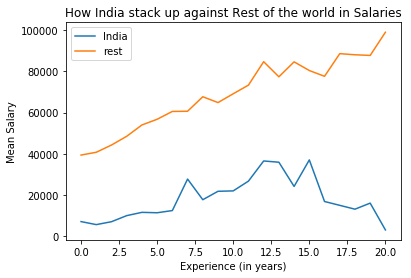

In [119]:
df_updated.groupby('Rest_or_India')['Salary'].plot(legend=True)
plt.title("How India stack up against Rest of the world in Salaries");
plt.xlabel('Experience (in years)')
plt.ylabel('Mean Salary')

#### Insight 2: Rest of the world programmers are more satisfied with their career and jobs than their Indian counterparts

In [120]:
df_updated.groupby('Rest_or_India').mean().CareerSatisfaction

Rest_or_India
India    7.148171
rest     7.543144
Name: CareerSatisfaction, dtype: float64

In [121]:
df_updated.groupby('Rest_or_India').mean().JobSatisfaction

Rest_or_India
India    6.414261
rest     7.088962
Name: JobSatisfaction, dtype: float64

Here, we can see that rest of the world programmers (green ball) have a much higher satisfaction on their job and career, positioned at the right-high-up corner. The ball size indicator their average salary, the green  ball size is much larger than the red ball (Indian programmers salary).

Text(0,0.5,'Job Satisfaction')

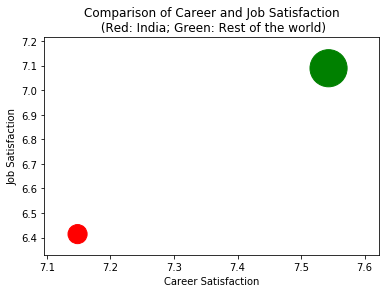

In [122]:
#Plot Comparison of Career and Job Satisfaction between Western and Eastern
plt.scatter(df_updated.groupby('Rest_or_India').mean().CareerSatisfaction, df_updated.groupby('Rest_or_India').mean().JobSatisfaction, df_updated.groupby('Rest_or_India').mean().Salary/50, c=['red','green'])

plt.title('Comparison of Career and Job Satisfaction\n (Red: India; Green: Rest of the world)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

#### Insight 3: Indian programmers feel that they are underpaid than the rest of the world programmers

Here, we can see that Indian programmers definitely feel they are underpaid compared ot the rest of the world

Text(0,0.5,'Overpaid')

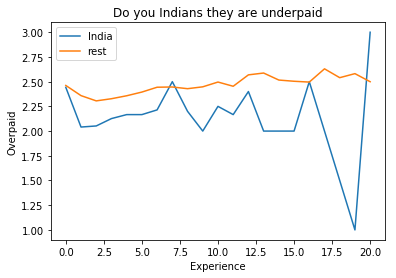

In [124]:
df_updated.groupby('Rest_or_India')['Overpaid'].plot(legend=True)
plt.title("Do you Indians they are underpaid");
plt.xlabel('Experience')
plt.ylabel('Overpaid')

### Conclusion
- Indian programmer are paid much lower than that of the rest of the world.
- Indian programmers always think that they are underpaid than the rest of the world programmers 
- Rest of the world are more satisfied with their career than Indian Programmer